Adding weight regularization

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 0s 0us/step


In [7]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [8]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 47ms/step - loss: 0.4904 - acc: 0.8179 - val_loss: 0.3703 - val_acc: 0.8639
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2764 - acc: 0.9063 - val_loss: 0.3051 - val_acc: 0.8778
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2096 - acc: 0.9262 - val_loss: 0.2835 - val_acc: 0.8871
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1713 - acc: 0.9397 - val_loss: 0.2862 - val_acc: 0.8860
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1458 - acc: 0.9504 - val_loss: 0.3020 - val_acc: 0.8821
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1247 - acc: 0.9573 - val_loss: 0.3331 - val_acc: 0.8754
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1050 - acc: 0.9643 - val_loss: 0.3560 - val_acc: 0.8724
Epoch 8/20
49/49 [==============================] - 1s 27ms/step - loss: 0.0908 - a

In [3]:
from keras import regularizers
from keras import models
from keras import layers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.

In [4]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [5]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 56ms/step - loss: 0.5686 - acc: 0.7697 - val_loss: 0.4366 - val_acc: 0.8726
Epoch 2/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3483 - acc: 0.8991 - val_loss: 0.3428 - val_acc: 0.8867
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2797 - acc: 0.9176 - val_loss: 0.3299 - val_acc: 0.8878
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2523 - acc: 0.9286 - val_loss: 0.3341 - val_acc: 0.8861
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2373 - acc: 0.9330 - val_loss: 0.3436 - val_acc: 0.8811
Epoch 6/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2267 - acc: 0.9382 - val_loss: 0.3761 - val_acc: 0.8733
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2218 - acc: 0.9397 - val_loss: 0.3539 - val_acc: 0.8800
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2148 - a

In [12]:

original_val_loss = original_hist.history['val_loss']
l2_model_val_loss = l2_model_hist.history['val_loss']

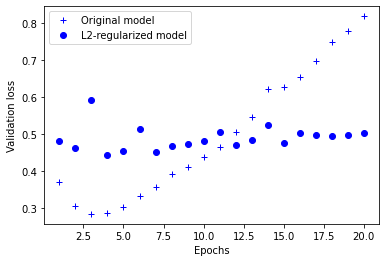

In [13]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


As you can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), even though both models have the same number of parameters.



As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

from keras import regularizers

L1 regularization
regularizers.l1(0.001)

L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

Adding dropout

In Keras you can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before it, e.g.:
    
model.add(layers.Dropout(0.5))

In [ ]:
# Let's add two Dropout layers in our IMDB network to see how well they do at reducing overfitting:

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Again, a clear improvement over the reference network.

To recap: here the most common ways to prevent overfitting in neural networks:

Getting more training data.
Reducing the capacity of the network.
Adding weight regularization.
Adding dropout.